# Time Series - Air Passenger

<h3>Context</h3>
This data is used for making ARIMA model forecasting.

<h3>Content</h3>
This contains the increasing rate of passenger

</h3>Acknowledgements</h3>
We wouldn't be here without the help of others. If you owe any attributions or thanks, include them here along with any citations of past research.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

airpas = pd.read_csv('AirPassengers.csv')
airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
airpas.Month = pd.to_datetime(airpas.Month, infer_datetime_format=True)
ind_airpas = airpas.set_index(['Month'])
ind_airpas_log = np.log(ind_airpas)

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

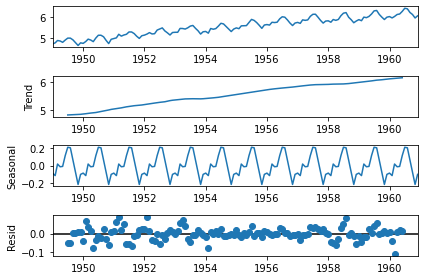

In [14]:
# To see the Seasonal pattern in form of grpahs we use this package
# Beloow grpahs is used to get the information that data has a seasonal effect
result =  seasonal_decompose(ind_airpas_log)
result.plot(); 

In [15]:
auto_arima (ind_airpas_log, seasonal=True, m=12) 

#<- here we need to give seasonal = True because our data is seasonal,
# if the data is not seasonal after analysing please give it as False

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [16]:
model_sarima = SARIMAX(ind_airpas_log, order=(2, 0, 0), seasonal_order=(0, 1, 1, 12))

# order=(2, 0, 0) <- prediction on entire data
# seasonal_order=(0, 1, 1, 12)<- on yearly data (p, d, q, seasonal duration(12 here, since its yearly))

C:\Users\PRIME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRIME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [17]:
results = model_sarima.fit()

In [19]:
results.predict() #<- it prredicted for all the data we trained it on

1949-01-01    0.000000e+00
1949-02-01    7.733452e-08
1949-03-01    1.539883e-07
1949-04-01    2.298303e-07
1949-05-01    3.029728e-07
                  ...     
1960-08-01    6.436375e+00
1960-09-01    6.238439e+00
1960-10-01    6.097030e+00
1960-11-01    5.991813e+00
1960-12-01    6.083812e+00
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

In [31]:
pred_result = results.predict(start = 132, end =143)

In [ ]:
# model has been built Forecst has been done.

In [23]:
# Below code is for Validation Purpose

In [32]:
pred_result_actual_scale = np.exp(pred_result)

In [33]:
pred_result_actual_scale

1960-01-01    419.512088
1960-02-01    397.361417
1960-03-01    458.654940
1960-04-01    419.752270
1960-05-01    459.927602
1960-06-01    547.649941
1960-07-01    611.442799
1960-08-01    624.139909
1960-09-01    512.058619
1960-10-01    444.535485
1960-11-01    400.139516
1960-12-01    438.698371
Freq: MS, Name: predicted_mean, dtype: float64

In [35]:
# we find the MSE (mean square error)

error = ind_airpas.Passengers[132:144] - pred_result_actual_scale
np.mean(np.square(error))

375.1810755596426

In [37]:
mape = np.mean(np.abs(error *100 /ind_airpas.Passengers[132:144]))
mape

3.2312272323380156

In [ ]:
# Forecast for 1961 to 1962 (Next 2 Years Data Forecasting)

In [61]:
pred_result_new = results.predict(start = 144, end =167)
pred_result_new
pred_result_actual_scale_new = np.exp(pred_result_new)

<AxesSubplot:xlabel='Month'>

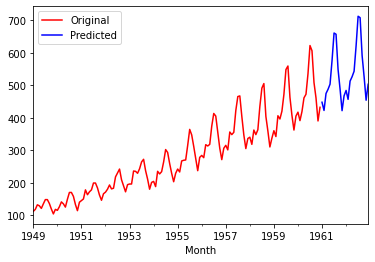

In [62]:
ind_airpas['Passengers'].plot(legend = True, label = 'Original', color='red') # train target data in green
pred_result_actual_scale_new.plot(legend = True, label = 'Predicted', color='blue') # Predicted target data in blue
#test['Passengers'].plot(legend = True, label = 'Actual', color='red') # test target data in red

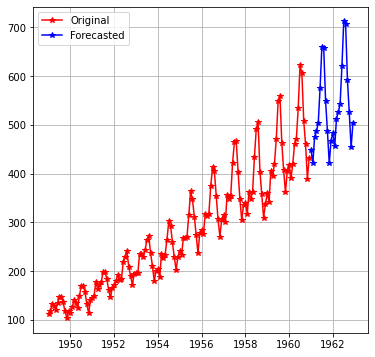

In [63]:
plt.figure(figsize=(6,6))
plt.plot(ind_airpas, marker ='*', color='r', label='Original')
plt.plot(pred_result_actual_scale_new, color='b', label = 'Forecasted', marker = "*")
plt.legend()
plt.grid()